<a href="https://colab.research.google.com/github/patriciagvas/projeto_eda_biocombustiveis/blob/main/Projeto_Biocombust%C3%ADveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OS códigos presentes neste colab foram reproduzidos a partir do projeto original 16_Biofuel Production Analysis de Mehmet Isik que está disponível no site Kaggle. Esta reprodução tem como objetivo apenas o aprendizado de técnicas de análises estatísticas e plotagem de gráficos com matplotlib, seaborn, bem como a limpeza de dados com Pandas.
Todos os créditos dos códigos são do autor original.
Link do projeto: https://www.kaggle.com/code/mehmetisik/16-biofuel-production-analysis

**<h1>Introdução:<h1>**

Os biocombustíveis são definidos como qualquer combustível derivado e produzido a partir de material orgânico, como plantas e seus resíduos, culturas agrícolas e seus subprodutos.

Recentemente, os biocombustíveis ganharam destque significativo no cenário mundial devido às reservas limitadas de petróleo, segurança energética e crescentes preocupações ambientais devido às crescentes mudanças climáticas e emissões de gases de efeito estufa.


Neste contetxo o presente projeto tem como objetivo analisar a produção de biocombustíveis nas últimas décadas a fim de obter insights e visualizar padrões que possibilitem uma melhor compreensão da produção mundial e regional de biocombustíveis, bem como a tomar decisões de investimento.



**<h1>Dataset:<h1>**

O Dataset apresenta um conjunto de dados sobre a produção de biocombustíveis em escala mundial, desde 1990 a 2021, ou seja, um panorama dessa produção desde o início do setor inudstrial de energia renovável.

Os dados são organizados em colunas como:

**Entidade:** representa o país ou grupo, oferecendo uma visão panorâmica dos dados de produção de biocombustíveis em escala regional e mundial;

**Ano:** indica a dimensão temporal dos dados, sendo crucial para compreender a trajetória da produção de biocombustíveis ao longo do tempo;

**Produção de biocombustíveis - TWh - Total:** apresenta o volume de produção de biocombustíveis de cada entidade, atuando como um indicador do compromisso com a energia renovável.


O Dataset utilizado neste projeto foi obtido no site Kaggle.

**Importação de Bibliotecas**

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import datetime
from sklearn.cluster import KMeans
from matplotlib.font_manager import FontProperties
from IPython.display import HTML as html_print
from termcolor import colored
from scipy import stats
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

**Importar Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets - projetos/16 biofuel-production.csv')
df.head(5)

,Entity,Code,Year,Biofuels Production - TWh - Total
0,Africa (BP),NaN,1990,0.068617
1,Africa (BP),NaN,1991,0.068617
2,Africa (BP),NaN,1992,0.068805
3,Africa (BP),NaN,1993,0.068617
4,Africa (BP),NaN,1994,0.068617


**Informações sobre os dados**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             1081 non-null   object 
 1   Code                               800 non-null    object 
 2   Year                               1081 non-null   int64  
 3   Biofuels Production - TWh - Total  1081 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 33.9+ KB


In [ ]:
df.dtypes

,0
Entity,object
Code,object
Year,int64
Biofuels Production - TWh - Total,float64


In [ ]:
df.shape

(1081, 4)

In [ ]:
metricas = df.describe()
print(metricas)

              Year  Biofuels Production - TWh - Total
count  1081.000000                        1081.000000
mean   2005.830712                          56.543887
std       9.197525                         138.262878
min    1990.000000                           0.000000
25%    1998.000000                           0.000000
50%    2006.000000                           3.642700
75%    2014.000000                          32.786575
max    2021.000000                        1114.488300


**Limpeza do Dataset**

In [ ]:
# Avaliar a presença de nulos no df
df.isnull().any() #Coluna Code possui nulos

,0
Entity,False
Code,True
Year,False
Biofuels Production - TWh - Total,False


In [ ]:
# Avaliar quantidade de nulos
df.isnull().sum() # A coluna Code possui um total de 281 valores nulos

,0
Entity,0
Code,281
Year,0
Biofuels Production - TWh - Total,0


In [ ]:
# Avaliar a presença de duplicatas
df.duplicated() #Nenhuma linha duplicada

,0
0,False
1,False
2,False
3,False
4,False
...,...
1076,False
1077,False
1078,False
1079,False


In [ ]:
# Eliminação da coluna Code devido a presença de muitos valores nulos, ademais, a mesma não será necessária para o desenvolvimento dos insights
df = df.drop(columns = ['Code'])
df.head(5)

,Entity,Year,Biofuels Production - TWh - Total
0,Africa (BP),1990,0.068617
1,Africa (BP),1991,0.068617
2,Africa (BP),1992,0.068805
3,Africa (BP),1993,0.068617
4,Africa (BP),1994,0.068617


In [ ]:
# Salvar df limpo em um arquivo excel para uso posterior
df.to_excel('biofuels_production_excel.xlsx')

**Análises estatísticas**

In [ ]:
# Avaliar por meio do desvio padrão a volatilidade anual na produção de biocombustíveis
volatilidade_anual = df.groupby('Year')['Biofuels Production - TWh - Total'].std().reset_index()
print(volatilidade_anual)

    Year  Biofuels Production - TWh - Total
0   1990                          23.537711
1   1991                          26.448234
2   1992                          24.832356
3   1993                          24.762679
4   1994                          27.316185
5   1995                          28.079819
6   1996                          29.491828
7   1997                          33.140591
8   1998                          31.062643
9   1999                          29.489161
10  2000                          26.579666
11  2001                          28.877374
12  2002                          33.103252
13  2003                          40.489100
14  2004                          45.217906
15  2005                          52.592803
16  2006                          66.474045
17  2007                          89.347912
18  2008                         121.332562
19  2009                         134.795045
20  2010                         155.841414
21  2011                        

In [ ]:
fig = go.Figure(data=[
    go.Bar(
        x=volatilidade_anual['Year'],
        y=volatilidade_anual['Biofuels Production - TWh - Total'],
        marker_color='green'
    )
])

fig.update_layout(
    title={
        'text': 'Volatilidade Anual na Produção de Biocombustíveis',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis=dict(title='Ano', tickmode='linear'),
    yaxis=dict(title='Desvio Padrão da Produção de Biocombustíveis (TWh)'),
    showlegend=False
)

fig.show()

O gráfico de barras fornece uma representação clara das flutuações na produção global de biocombustíveis ao longo dos anos, conforme indicado pelos valores de desvio padrão. Essas variações sugerem diferentes taxas de crescimento da produção de biocombustíveis, que podem ser atribuídas a condições de mercado, mudanças de política ou avanços em tecnologias de biocombustíveis. O gráfico serve como uma ferramenta importante para investidores e formuladores de políticas entenderem a estabilidade e o risco associados ao mercado de biocombustíveis.





---



In [ ]:
# Produção Total de Biocombustíveis

entidades = df[df['Entity'].str.contains("World|OECD|G20|EU|America|Asia|Europe|Africa")]
biocombustiveis_total = entidades.groupby('Entity')['Biofuels Production - TWh - Total'].sum().sort_values(ascending=False).reset_index()
print(biocombustiveis_total)

                           Entity  Biofuels Production - TWh - Total
0                           World                       14871.722630
1                       OECD (BP)                        8625.900712
2                   Non-OECD (BP)                        6245.821969
3              North America (BP)                        6063.099270
4  South and Central America (BP)                        4751.962201
5                     Europe (BP)                        2394.277545
6             European Union (27)                        2289.419366
7               Asia Pacific (BP)                        1632.946518
8                     Africa (BP)                          23.887531


In [ ]:
fig = px.bar(biocombustiveis_total, y='Entity', x='Biofuels Production - TWh - Total',
             title='Produção Total de Biocombustíveis',
             labels={'Entity': 'Grupo', 'Biofuels Production - TWh - Total': 'Produção Total de Biocombustíveis (TWh)'},
             color='Biofuels Production - TWh - Total', color_continuous_scale='viridis')

fig.update_layout(yaxis={'categoryorder':'total ascending'})

Este gráfico de barras captura sucintamente a hierarquia da produção de biocombustíveis por principais entidades e regiões globais. A escala de cores gradiente, em transição de roxo para verde, guia visualmente o observador por vários níveis de produção de biocombustíveis, destacando o domínio de certos grupos. Notavelmente, a ordem decrescente mostra uma disparidade gritante na produção, refletindo a concentração da geração de biocombustíveis em áreas específicas. Esta visualização destaca a importância das alianças geopolíticas e econômicas na condução das capacidades de produção de biocombustíveis em todo o mundo.

---



In [ ]:
# Produção de Biocombustíveis na América do Sul e Central ao longo do tempo

biocombustivel_latino = df[df['Entity'] == 'South and Central America (BP)']
print(biocombustivel_latino)

                             Entity  Year  Biofuels Production - TWh - Total
857  South and Central America (BP)  1990                          65.812126
858  South and Central America (BP)  1991                          73.699990
859  South and Central America (BP)  1992                          67.547660
860  South and Central America (BP)  1993                          65.395775
861  South and Central America (BP)  1994                          71.713806
862  South and Central America (BP)  1995                          73.024290
863  South and Central America (BP)  1996                          81.216484
864  South and Central America (BP)  1997                          89.178270
865  South and Central America (BP)  1998                          81.387665
866  South and Central America (BP)  1999                          75.168510
867  South and Central America (BP)  2000                          62.228620
868  South and Central America (BP)  2001                          66.813805

In [ ]:
frames = [go.Frame(
    data=[go.Scatter(x=biocombustivel_latino['Year'][:k+1], y=biocombustivel_latino['Biofuels Production - TWh - Total'][:k+1], mode='lines+markers')],
    layout=go.Layout(title_text=f'Biofuel Production in the United States ({year})')
) for k, year in enumerate(biocombustivel_latino['Year'])]

initial_frame = go.Frame(
    data=[go.Scatter(x=[biocombustivel_latino['Year'].iloc[0]], y=[biocombustivel_latino['Biofuels Production - TWh - Total'].iloc[0]], mode='markers')],
    layout=go.Layout(title_text='Produção de Biocombustíveis na América do Sul e Central (1990 - 2021)')
)
frames.insert(0, initial_frame)

fig = go.Figure(
    data=[go.Scatter(x=biocombustivel_latino['Year'], y=biocombustivel_latino['Biofuels Production - TWh - Total'], mode='lines+markers')],
    layout=go.Layout(
        xaxis=dict(range=[biocombustivel_latino['Year'].min(), biocombustivel_latino['Year'].max()], autorange=False),
        yaxis=dict(range=[0, biocombustivel_latino['Biofuels Production - TWh - Total'].max() + biocombustivel_latino['Biofuels Production - TWh - Total'].max()*0.1], autorange=False),
        title="Produção de Biocombustíveis na América do Sul e Central (1990 - 2021)",
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None])])]
    ),
    frames=frames
)

fig.show()

A progressão animada da produção de biocombustíveis da América Latina fornece uma narrativa perspicaz do crescimento dentro do setor. A trajetória crescente ao longo dos anos demonstra um aumento significativo na produção de biocombustíveis, refletindo o investimento do país em fontes de energia renováveis. O aspecto interativo da animação, com um recurso de botão de reprodução, permite que as partes interessadas observem as mudanças ano a ano, destacando os movimentos estratégicos da América LAtina em direção à produção de energia sustentável e seu papel na transição energética global.


---



In [ ]:
# Produção global de biocombustíveis ao longo dos anos

fig = px.scatter(
    df,
    x='Year',
    y='Biofuels Production - TWh - Total',
    title='Produção Global de Biocombustíveis Ao Longo dos Anos',
    labels={'Biofuels Production - TWh - Total': 'Biofuels Production (TWh)', 'Year': 'Year'}
)

fig.update_layout(
    xaxis_title='Ano',
    yaxis_title='Produção de Biocombustíveis (TWh)',
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True)
)

Este gráfico de dispersão encapsula as tendências globais de produção de biocombustíveis, destacando a variabilidade e o crescimento em diferentes anos. Cada ponto de dados representa a produção de um ano, permitindo um exame detalhado das flutuações e tendências na produção de biocombustíveis. As linhas de grade melhoram a legibilidade e a precisão na compreensão dos níveis de produção anual, ressaltando a crescente importância dos biocombustíveis na matriz energética global.


---



In [ ]:
# Produção Regional de Biocombustíveis (América Latina x EUA)

entidades_regionais = ['South and Central America (BP)', 'United States']

regional_biocombustiveis_producao = df[df['Entity'].isin(entidades_regionais)].pivot(index='Year', columns='Entity', values='Biofuels Production - TWh - Total')

fig = go.Figure()

for country in entidades_regionais:
    fig.add_trace(go.Scatter(x=regional_biocombustiveis_producao.index, y=regional_biocombustiveis_producao[country], mode='lines+markers', name=country,
                             line=dict(width=3), marker=dict(size=8)))

fig.update_layout(title={'text': "Produção de Biocombustíveis EUA x América Latina", 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title='Ano',
                  yaxis_title='Produção de Biocombustíveis (TWh)',
                  legend_title='País/Região',
                  template='plotly_dark',
                  margin=dict(l=20, r=20, t=60, b=20))

Este gráfico multilinha traça a produção de biocombustíveis na América Latina e Estados Unidos, delineando suas trajetórias individuais e comparativas ao longo do tempo. As linhas distintas para cada país, com marcadores em negrito nos pontos de dados, facilitam uma análise comparativa clara, destacando a jornada única de produção de biocombustíveis de cada um. O tema escuro do gráfico acentua as linhas de dados, tornando as tendências facilmente discerníveis e enfatizando o papel crescente dos biocombustíveis nessas economias-chave.


---



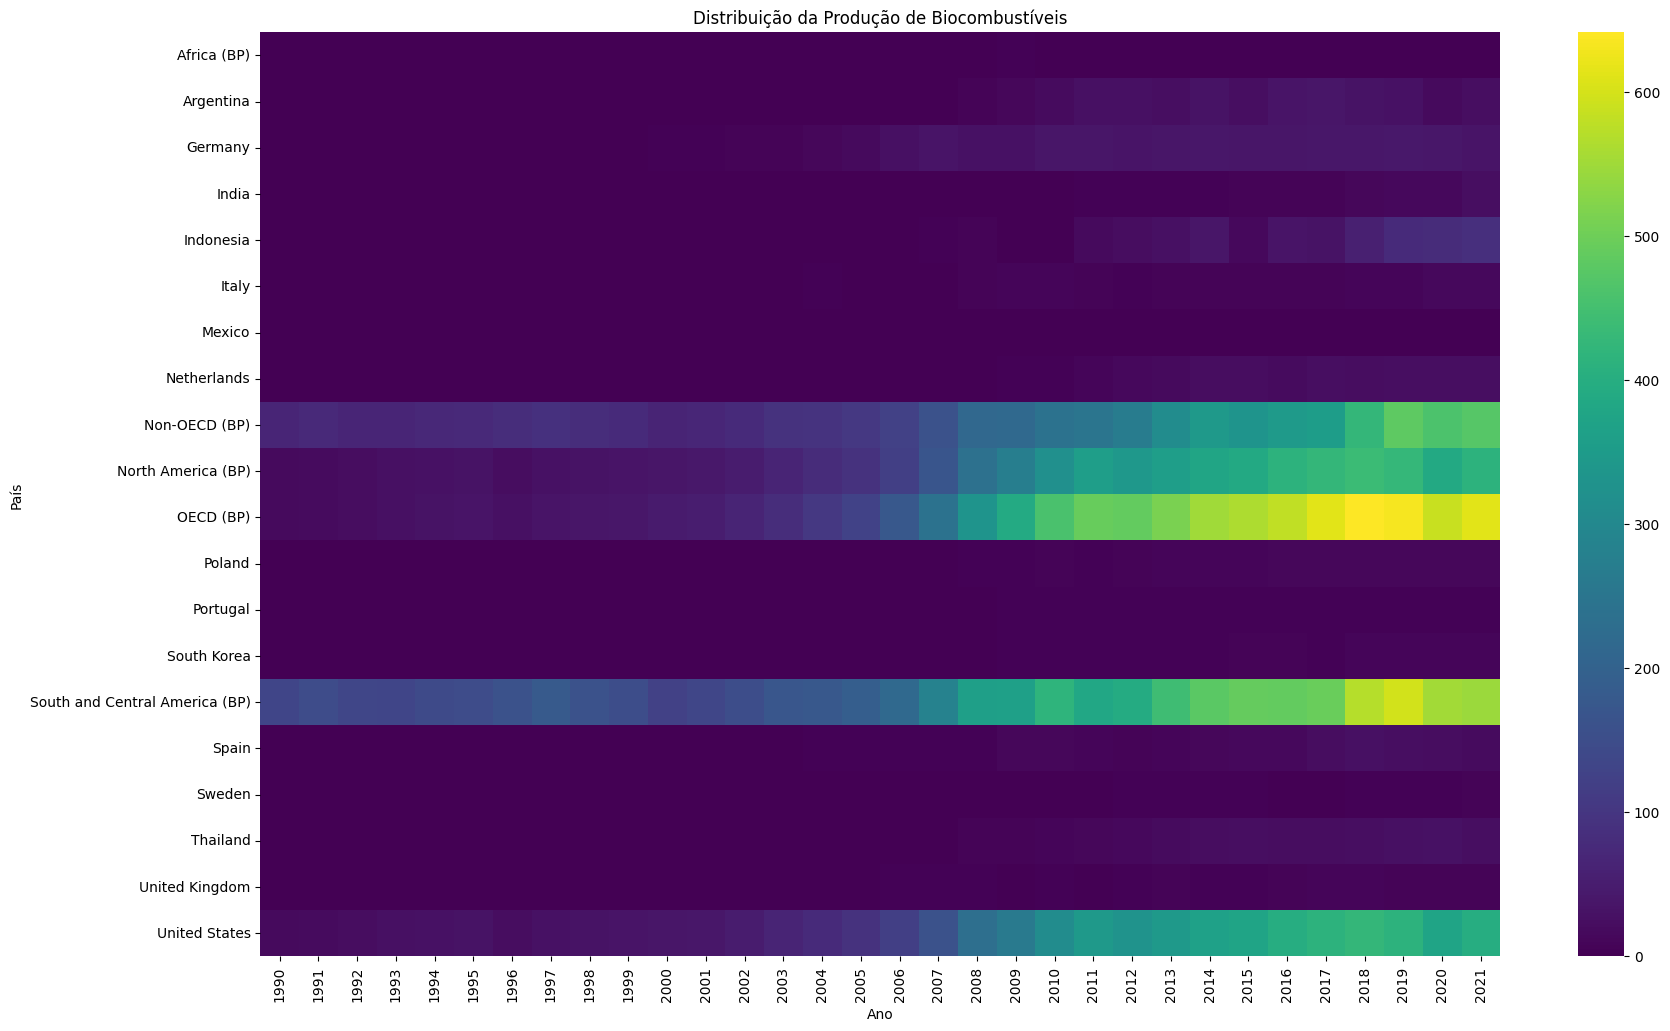

In [ ]:
# Distribuição da produção de biocombustíveis entre os 20 maiores produtores e a América Latina

top_paises = df['Entity'].value_counts().head(20).index

filtered_data = df[df['Entity'].isin(top_paises)]

americalatina_data = df[df['Entity'] == 'South and Central America (BP)']

filtered_data_updated = filtered_data[filtered_data['Entity'] != 'European Union']
filtered_data_updated = pd.concat([filtered_data_updated, americalatina_data])

heatmap_data_updated = filtered_data_updated.pivot_table(
    index='Entity', columns='Year',
    values='Biofuels Production - TWh - Total',
    aggfunc='sum'
)

plt.figure(figsize=(20, 12))
sns.heatmap(heatmap_data_updated, annot=False, cmap="viridis")
plt.title('Distribuição da Produção de Biocombustíveis')
plt.xlabel('Ano')
plt.ylabel('País')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

O mapa de calor ilustra vividamente o cenário de produção de biocombustíveis nos 20 principais países e a América Latina, oferecendo uma visão térmica da intensidade da produção ao longo dos anos. Tons de verde representam níveis variados de produção de biocombustíveis, com tons mais escuros indicando maiores volumes de produção. Esta representação visual ressalta as diversas contribuições de biocombustíveis por diferentes nações, destacando tendências, surtos e potenciais potencialmente inexplorados dentro do setor de bioenergia.


---



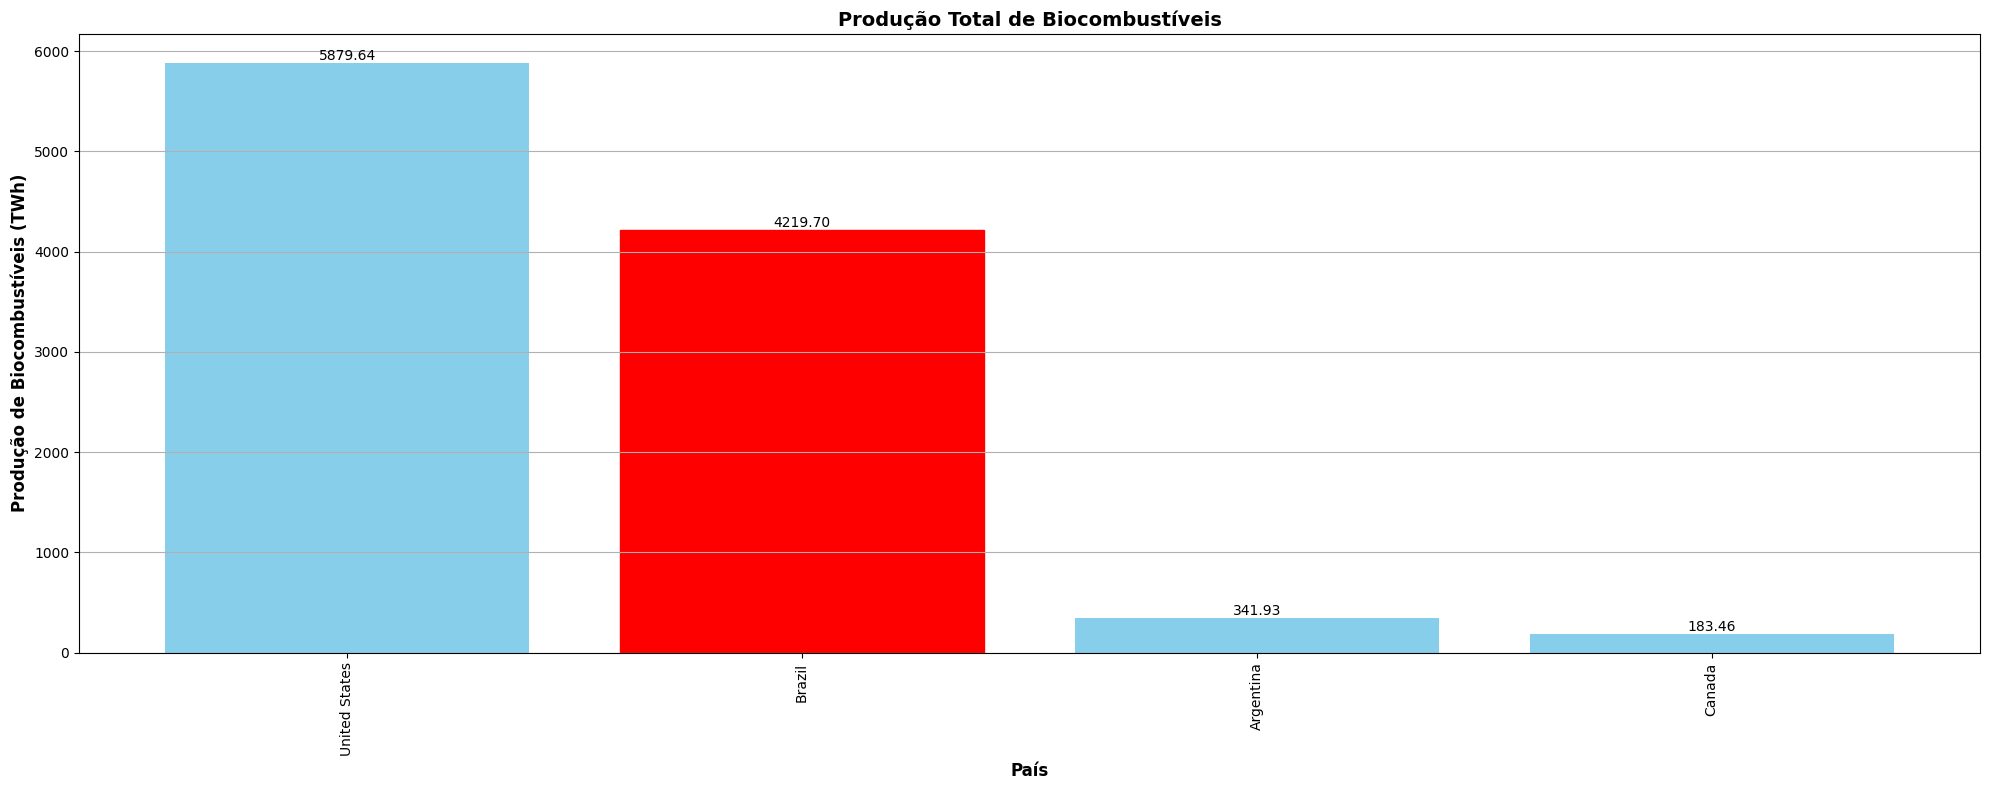

In [ ]:
# Comparação entre a produção de biocombustíveis do Brasil, Argentina, Canadá e EUA

paises_americanos = [ "United States",  "Brazil", "Canada", "Argentina"]

paises_americanos_data = df[df['Entity'].isin(paises_americanos)]
producao_total_paises_americanos = paises_americanos_data.groupby('Entity')['Biofuels Production - TWh - Total'].sum().sort_values(ascending=False)


plt.figure(figsize=(20, 8))
bars = plt.bar(producao_total_paises_americanos.index, producao_total_paises_americanos.values, color='skyblue')
plt.title('Produção Total de Biocombustíveis', fontsize=14, fontweight='bold')
plt.xlabel('País', fontsize=12, fontweight='bold')
plt.ylabel('Produção de Biocombustíveis (TWh)', fontsize=12, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

for bar in bars:
    if bar.get_x() + bar.get_width() / 2 == producao_total_paises_americanos.index.get_loc("Brazil"):
        bar.set_color('red')
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Este gráfico de barras mostra a produção total de biocombustíveis em países  selecionados do continente Americano, destacando o Brasil com uma barra vermelha distinta para ressaltar sua contribuição significativa, ocupando o segundo lugar na produção de biocombustíveis. A visualização classifica efetivamente os países americanos por sua produção de biocombustíveis, revelando líderes no setor e classificações comparativas. Notavelmente, o gráfico transmite o compromisso diversificado com a produção de biocombustíveis, servindo como referência para avaliar as prioridades e investimentos globais em bioenergia.



---



In [ ]:
# Distribuição da produção de biocombustíveis no Brasil de 2011 a 2021

brasil_data = df[(df['Entity'] == 'Brazil') & (df['Year'] >= 2011)]

producao_brasil = brasil_data['Biofuels Production - TWh - Total']
decada = brasil_data['Year']

fig = go.Figure(data=[go.Pie(labels=decada, values=producao_brasil, hole=0.1,
                             pull=[0.1 if i == producao_brasil.idxmax() else 0 for i in producao_brasil.index])])

fig.update_traces(textinfo='percent+label')
fig.update_layout(title_text="Distribuição da produção de biocombustíveis no Brasil de 2011 a 2021")

O gráfico de pizza delineia a distribuição da produção de biocombustíveis no Brasil de 2011 a 2021. O segmento destacado, puxado ligeiramente para fora, representa o ano com a maior produção, enfatizando sua importância. Esta representação gráfica não apenas ilustra as cotas de produção anual, mas também ressalta a natureza flutuante da produção de biocombustíveis, refletindo fatores como mudanças de política, demanda de mercado e avanços tecnológicos no setor de bioenergia.



---



In [ ]:
# Mapa mundial da produção de biocombustíveis

fig = px.choropleth(
    df,
    locations="Entity",
    locationmode="country names",
    color="Biofuels Production - TWh - Total",
    animation_frame="Year",
    color_continuous_scale="YlGnBu",
    range_color=(0, df["Biofuels Production - TWh - Total"].max())
)

fig.update_geos(projection_type="natural earth")

fig.update_layout(
    title="Produção de Biocombustíveis(TWh)",
    coloraxis_colorbar={"title": "Produção de Biocombustíveis(TWh)"}
)

O mapa coroplético animado oferece uma perspectiva global sobre a produção de biocombustíveis, com cada quadro representando dados de um ano. O gradiente de cores de azul claro a azul escuro ilustra a gama de volumes de produção, permitindo uma compreensão intuitiva das contribuições regionais para o mercado de biocombustíveis. Esta ferramenta visual comunica efetivamente o crescimento e a disseminação da produção de biocombustíveis entre os países, destacando o papel crescente das fontes de energia sustentáveis ​​em todo o mundo.


---



**<h1> Conclusão:<h1>**

Aprofundar-se no conjunto de dados de produção de biocombustíveis revela a história em desenvolvimento da bioenergia como um elemento essencial na matriz de energia renovável. Os dados registram uma jornada de progresso, destacando o papel essencial dos biocombustíveis no aprimoramento da diversidade e sustentabilidade energética. O crescimento evidente na produção de biocombustíveis em várias regiões reflete o avanço global em direção à redução da dependência de combustíveis fósseis e à mitigação dos impactos das mudanças climáticas.

Esta viagem analítica se estende além dos números, retratando um esforço coletivo para promover uma transição energética sustentável. Os insights obtidos enfatizam a importância de políticas de apoio, inovação em tecnologia de biocombustíveis e colaborações transfronteiriças. Estando na vanguarda do movimento da bioenergia, este conjunto de dados não apenas encapsula tendências históricas, mas também projeta um futuro em que os biocombustíveis ocupam um lugar significativo na busca global por fontes de energia limpas e renováveis, incitando todas as partes interessadas a explorar e investir ainda mais no potencial dos biocombustíveis para um mundo sustentável.